## Feature Importance with Random Forests

Random Forests aggregate many decision trees and provide a reliable estimate of
feature importance.  In this notebook, we train a Random Forest classifier
on the breast cancer dataset and plot the relative importance of each feature.


Accuracy: 0.942

Classification Report:
              precision    recall  f1-score   support

   malignant       0.94      0.91      0.92        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



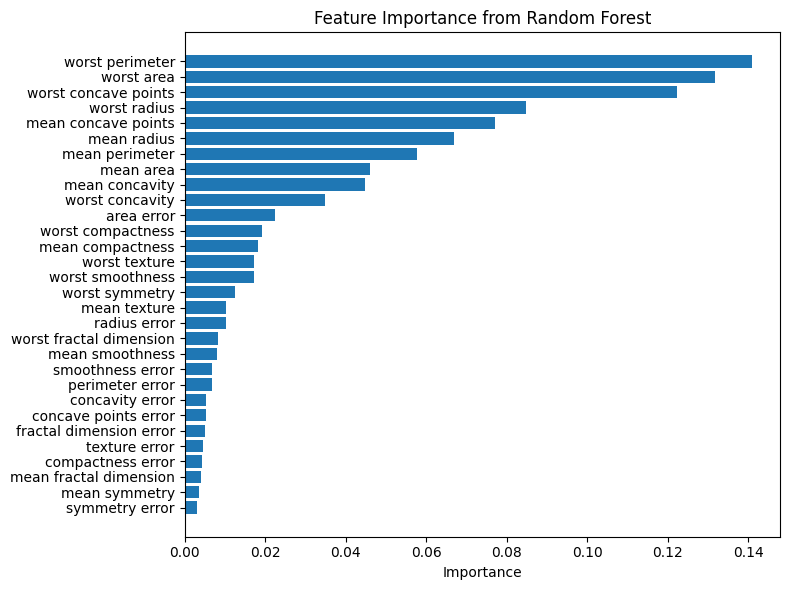

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Evaluate performance
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print()  # Blank line before the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


### Interpretation

The breast cancer classifier achieves high accuracy, but what's more informative is which features it relies on.  Variables like **worst radius**, **worst perimeter** and **mean concave points** rank near the top.  Clinicians can use this knowledge to prioritise diagnostic tests and interpret model predictions within a medical context.
